### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 목표값이 0 과 1 과 같이 구분값으로 주어지는 분류(classification) 알고리즘이다.
- Iris 데이터의 경우 0(Setosa), 1(Versicolor), 2(Virginica) 와 같이 구분되어 타겟값이 지정되어 있다.
- 분류인데 회귀란 이름이 들어간 이유는, 목표값인 0과 1에 근사시키는 곡면을 만들기 때문이다.

- 다시, Iris 데이터를 살펴보자.

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

Populating the interactive namespace from numpy and matplotlib


scatter matrix!


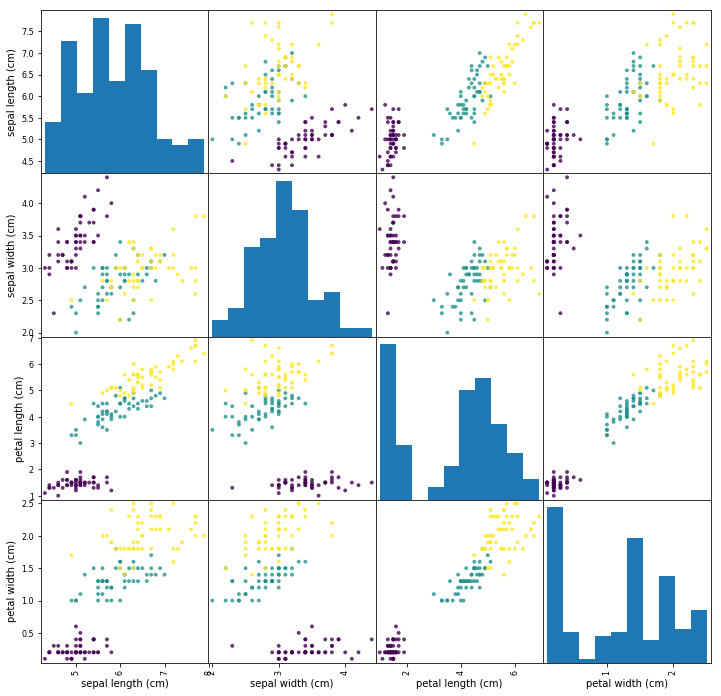

In [2]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
print('scatter matrix!')

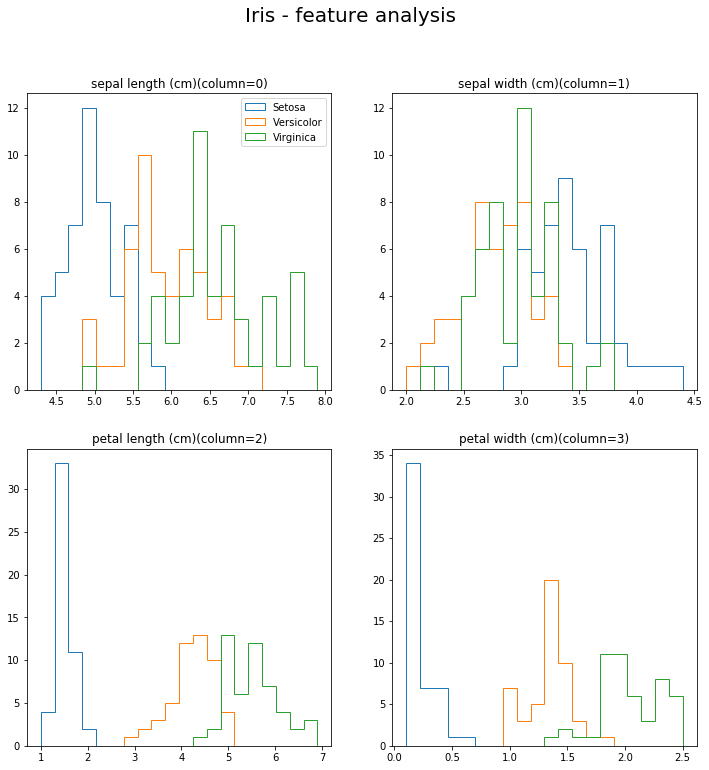

In [3]:
setosa = iris.data[iris.target==0]
versicolor = iris.data[iris.target==1]
virginica = iris.data[iris.target==2]

fig=plt.figure(figsize=[12,12])
fig.suptitle('Iris - feature analysis', fontsize=20)

for col in range(4): # 4 features
    plt.subplot(2,2,col+1)
    _,bins=np.histogram(iris.data[:,col],bins=20)
    plt.hist(setosa[:,col],bins=bins,label='Setosa',histtype='step')
    plt.hist(versicolor[:,col],bins=bins,label='Versicolor',histtype='step')
    plt.hist(virginica[:,col],bins=bins,label='Virginica',histtype='step')
    
    plt.title(iris.feature_names[col]+('(column=%d)' % col))
#     plt.xticks([])
#     plt.yticks([])
    if col==0: plt.legend()

- 위의 히스토그램은 각 속성별로 값에 따른 클래스 분포를 보여준다.
- petal length 와 petal width 두 속성이 클래스를 잘 구분하고 있음을 알 수 있다.
- 로지스틱 회귀를 시각화하기 좋게 petal length 한가지 속성만 사용하고, 목표값을 setosa 는 0, versicolor 와 virginica 는 1 로 놓고 테스트 하겠다.

In [4]:
X = iris.data[:,[0]] # [0] 와 같이 한번 싼 형태에 주의!
#X = iris.data[:,0].reshape(-1,1)
y = iris.target.copy()
y[y==2] = 1

display(X.shape, y.shape, X[:5], y)

(150, 1)

(150,)

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0,0.5,'class')

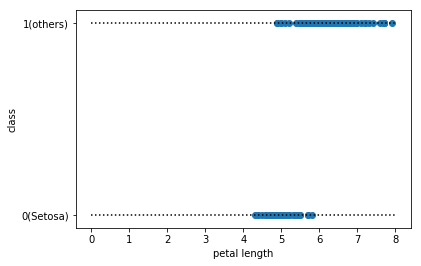

In [5]:
plt.hlines([0,1], 0, 8, linestyles='dotted')
#plt.hlines(1,0,8,linestyles='dotted')
plt.scatter(X[:,0],y)
plt.yticks([0,1],['0(Setosa)', '1(others)'])
plt.xlabel('petal length')
plt.ylabel('class')

- 위의 그래프에서 y축 값이 0 또는 1 인가에 따라 클래스가 구분하고 있다.
- 이 점들에 근사하는 선을 그어야 하는데 직선은 불가능하다. 적당한 곡선을 적용해야 하는데 그것이 **sigmoid** 함수이다.
- $ sigmoid(t) = \frac{1}{1+e^{-t}} $

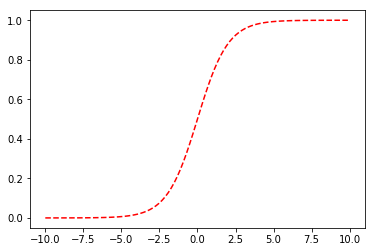

In [6]:
def sigmoid(t):
    return 1/(1+np.exp(-t))
    
rng = np.linspace(-10,10,100)
plt.plot(rng,sigmoid(rng),'r--')

- sigmoid 함수는 t=0 에서 1/2 값을 가진다. 그리고 t 가 커질수록 1에 가까워지고, t 가 작아질수록 0에 가까워진다.
- sigmoid 함수의 결과값이 0.5 보다 크면 클래스1, 작으면 클래스0 이라고 판단한다.

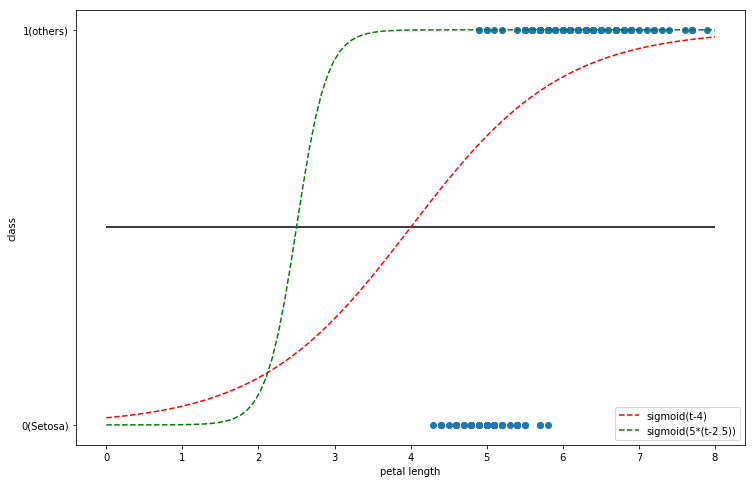

In [7]:
plt.figure(figsize=[12,8])

# plt.hlines(0,0,8,linestyles='dotted')
# plt.hlines(1,0,8,linestyles='dotted')
plt.hlines(0.5,0,8,linestyles='solid')

plt.scatter(X[:,0],y)

plt.yticks([0,1],['0(Setosa)', '1(others)'])
plt.xlabel('petal length')
plt.ylabel('class')

rng = np.linspace(0,8,100)
plt.plot(rng,sigmoid(rng-4),'r--',label='sigmoid(t-4)')
plt.plot(rng,sigmoid(5*(rng-2.5)),'g--',label='sigmoid(5*(t-2.5))')

plt.legend(loc='lower right')

- 결국 로지스틱 회귀는 클래스값을 새로운 축으로 추가한 다음 그에 근사하는 sigmoid 초평면을 찾아 내는 문제이다.
- 아래에서 scikit-learn 의 LogisticRegression 기능을 사용하겠다.

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
w = model.coef_
b = model.intercept_

w, b

(array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
        [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
        [-1.70752515, -1.53426834,  2.47097168,  2.55538211]]),
 array([ 0.26560617,  1.08542374, -1.21471458]))

ValueError: operands could not be broadcast together with shapes (4,) (100,) 

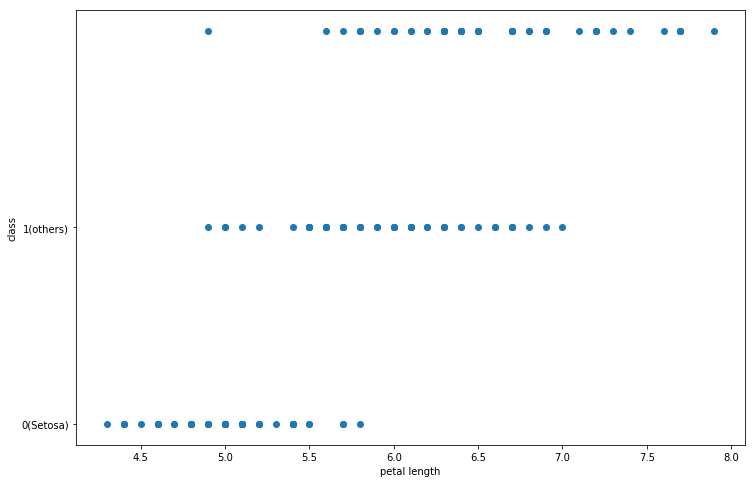

In [23]:
plt.figure(figsize=[12,8])

#!!!
plt.scatter(X[:,0],y)

plt.yticks([0,1],['0(Setosa)', '1(others)'])
plt.xlabel('petal length')
plt.ylabel('class')

#!!!
rng = np.linspace(0,8,100)
plt.plot(rng,sigmoid(w[0]*rng + b), 'r--', label='sigmoid')

plt.legend(loc='lower right')

boundary = -b / w[0]
plt.hlines(0.5,0,8,linestyles='solid',alpha=0.3)
plt.vlines(boundary,-0.1,1.1,linestyles='dotted')

plt.text(boundary+0.2,0.3,'boundary = %f' % boundary, va='center')

In [11]:
model.predict([[2],[4]])

array([0, 0])

In [12]:
model.predict_proba([[2],[4]])

array([[0.91854076, 0.08145924],
       [0.66451954, 0.33548046]])

In [24]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

- 원래 Iris 문제로 돌아가자. Iris 데이터는 속성이 4개이고 타겟값이 3개이다.
- 속성이 4개이므로 5차원 공간에서 4차원 sigmoid 평면이 적용된다.
- 타겟값이 3개이므로 sigmoid 평면이 3개 생성된다. 타겟값 1를 지정하고 나머지와 구분하는 평면을 그리기 때문이다.
- 속성이 4개면 시각화하기 어려우므로, 속성 2개를 선정하여 타겟값 3개에 대해 적용해 보겠다.
- sepal length 와 sepal width 로 테스트를 진행한다.

In [14]:
from sklearn.model_selection import train_test_split

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)

w = model.coef_
b = model.intercept_

display(w, b)

array([[-2.31211784,  3.74450036],
       [ 0.53374462, -1.6239073 ],
       [ 1.04278385, -1.66477278]])

array([ 0.63862388,  1.0378564 , -1.93148323])

Text(0.5,1,'Logistic Regression - Iris')

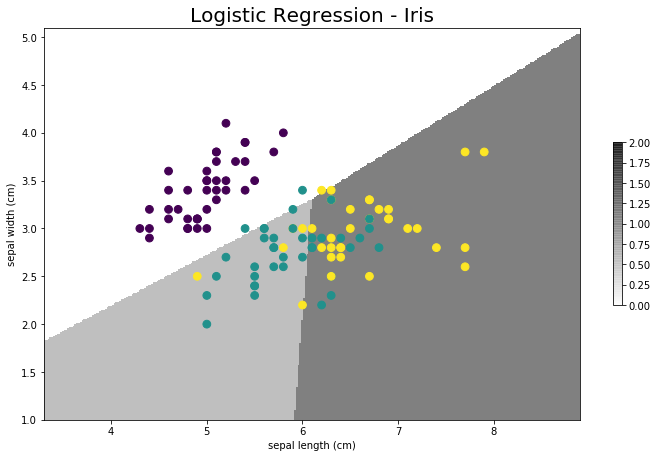

In [16]:
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.5, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink=0.3)
plt.title('Logistic Regression - Iris',fontsize=20)

In [17]:
score = model.score(X_test, y_test)
print(score)

0.7105263157894737


- 이제 속성을 모두 포함시켜 테스트를 수행하자.

In [18]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LogisticRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

display(train_score, test_score)

0.9732142857142857

0.9473684210526315